<a href="https://colab.research.google.com/github/Lythea/LabExam1_ML_Del-Mundo/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dataset
#Yeh,I-Cheng. (2007). Concrete Compressive Strength. UCI Machine Learning Repository. https://doi.org/10.24432/C5PK67.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

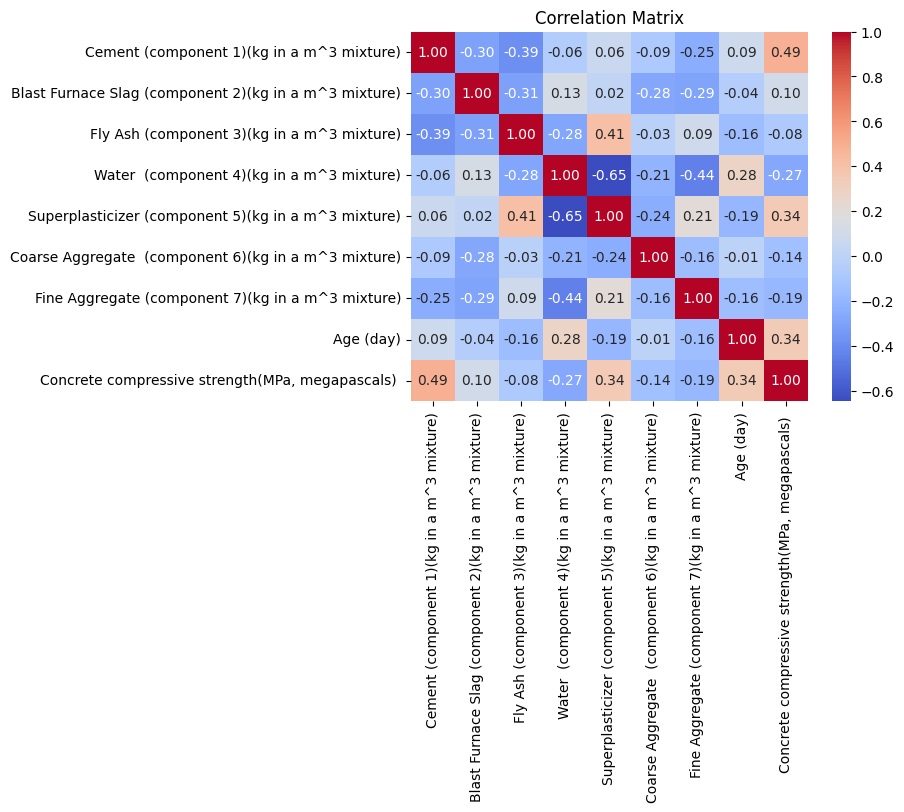


Linear Regression Performance:
Mean Squared Error (MSE): 153.38308042697054
Root Mean Squared Error (RMSE): 12.384792304555233
R-squared Score (R2): 0.4858522176394253

Ridge Regression Performance:
Mean Squared Error (MSE): 153.38313555873427
Root Mean Squared Error (RMSE): 12.384794530339786
R-squared Score (R2): 0.4858520328349868

SGD Regressor Performance:
Mean Squared Error (MSE): 5.94184048431781e+28
Root Mean Squared Error (RMSE): 243758907207876.4
R-squared Score (R2): -1.9917347465236484e+26


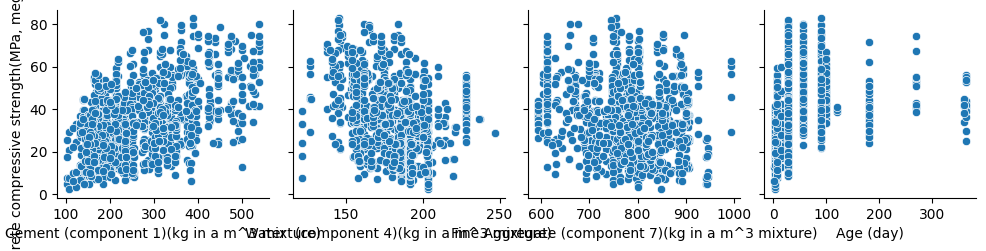

<Figure size 1000x2500 with 0 Axes>

<Figure size 1000x2500 with 0 Axes>

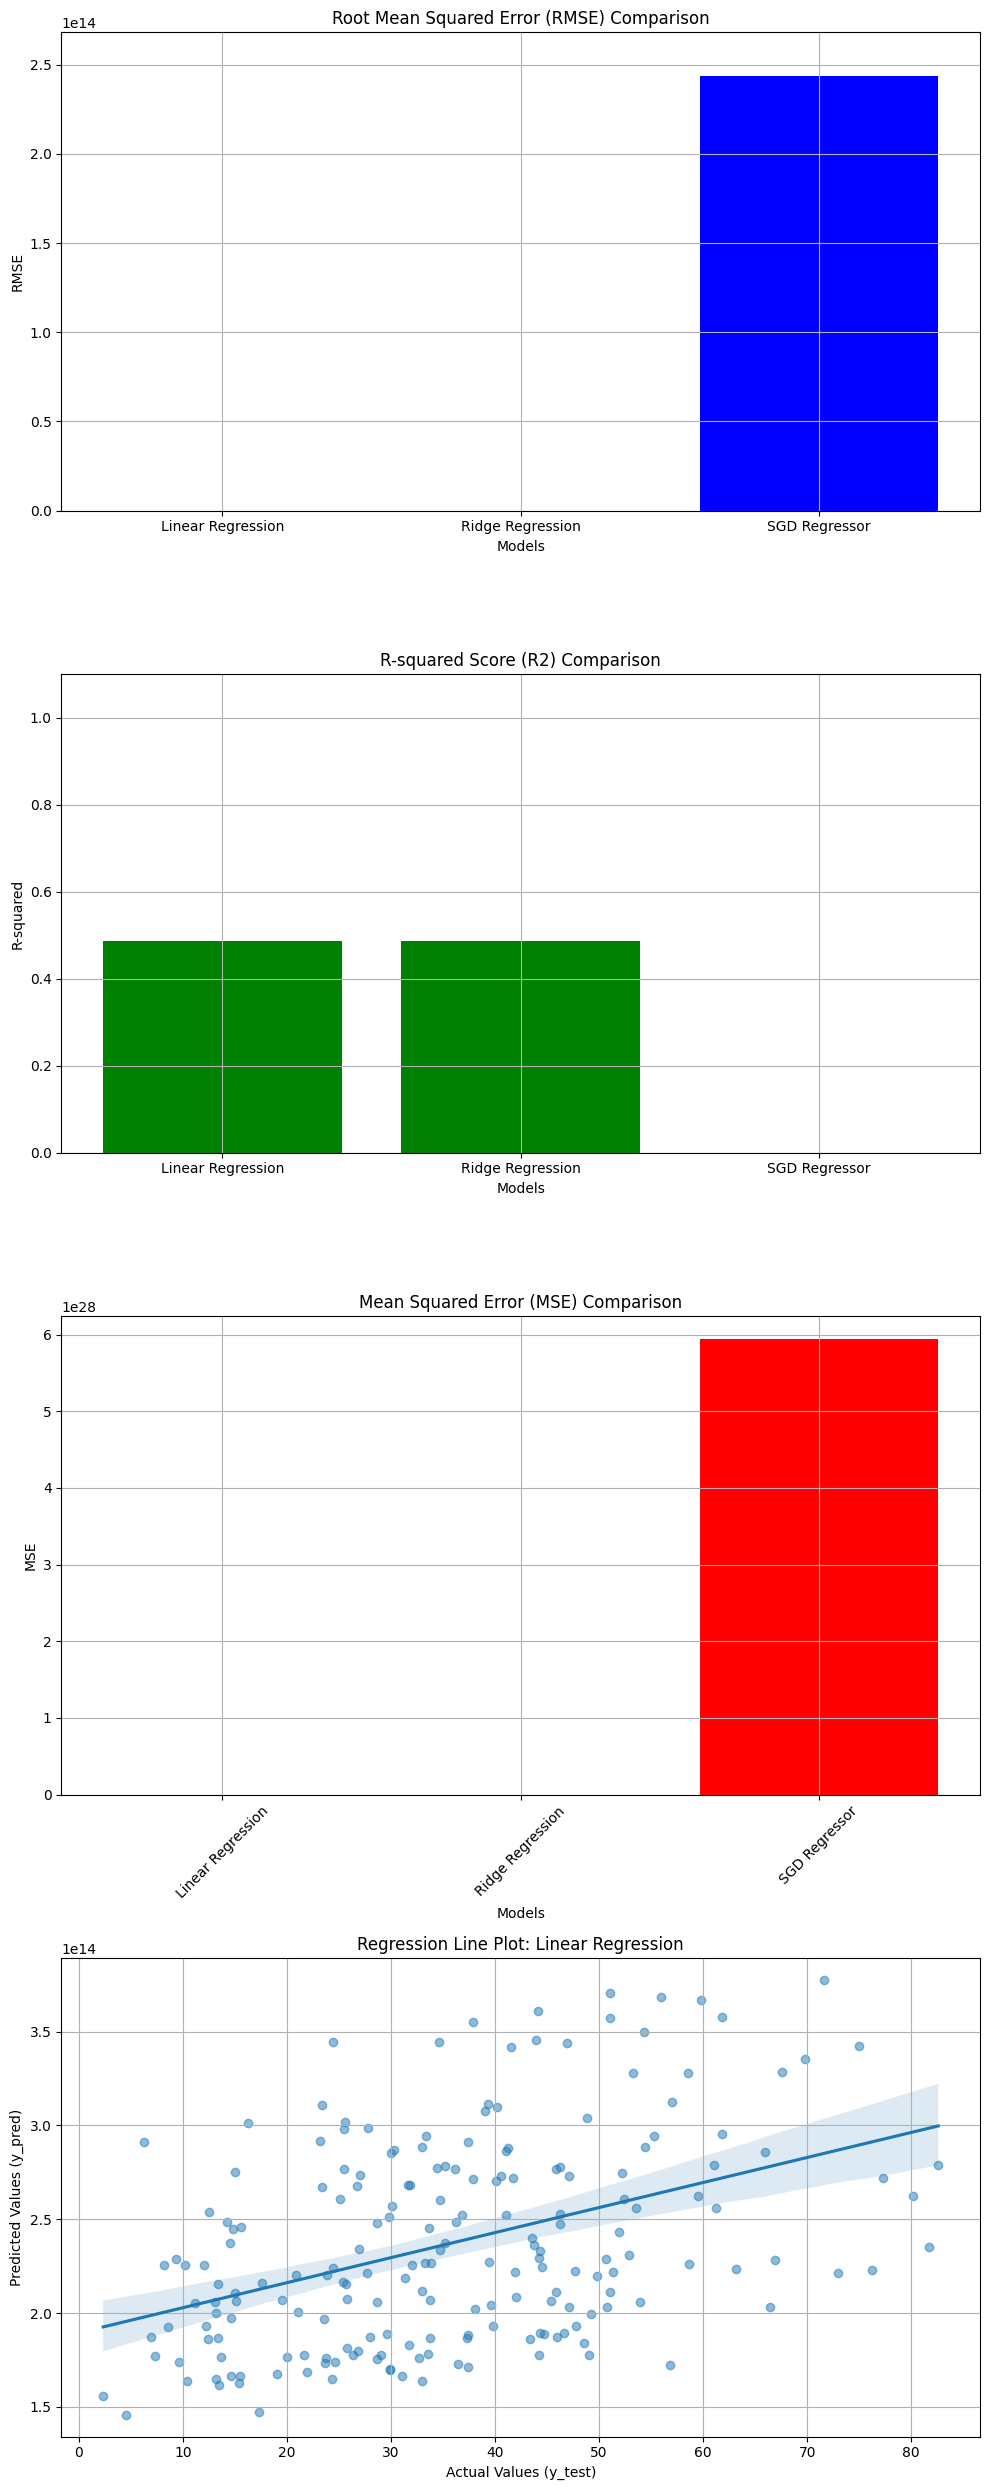

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Dataset/Dataset1.csv'))
dataset.info()
print(dataset.columns)

dataset.dtypes
dataset.isnull().sum()
dataset.dropna(inplace=True)
duplicates = dataset.duplicated()
print("Number of duplicate rows:", duplicates.sum())
dataset = dataset[~duplicates]
print("After removing duplicates:")
print(dataset.info())

print(dataset.columns)
X = dataset[['Cement (component 1)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']]
Y = dataset['Concrete compressive strength(MPa, megapascals) ']

print(dataset)

correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(dataset, x_vars=X.columns, y_vars='Concrete compressive strength(MPa, megapascals) ', kind='scatter', diag_kind='kde')

models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('SGD Regressor', SGDRegressor())
]

best_model = None
best_rmse = float('inf')
model_names = []
rmse_values = []
mse_values = []
r2_values = []
best_model_name = name

for name, model in models:
    pipeline = Pipeline(steps=[
        ('regressor', model)
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} Performance:")
    print("Mean Squared Error (MSE):", mse)
    print("R-squared Score (R2):", r2)
    print("Root Mean Squared Error (RMSE):", rmse)


    model_names.append(name)
    rmse_values.append(rmse)
    mse_values.append(mse)
    r2_values.append(r2)

    if rmse < best_rmse:
        best_rmse = rmse
        best_model = pipeline
        best_model_name = name

    plt.figure(figsize=(10, 25))

# Bar plot for RMSE
plt.subplot(411)
plt.bar(model_names, rmse_values, color='blue')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylim(0, max(rmse_values) * 1.1)
plt.grid(True)

# Bar plot for R-squared
plt.subplot(412)
plt.bar(model_names, r2_values, color='green')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Score (R2) Comparison')
plt.ylim(0, 1.1)
plt.grid(True)

# Bar plot for MSE
plt.subplot(413)
plt.bar(model_names, mse_values, color='red')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xticks(rotation=45)
plt.grid(True)

# Regression line plot
plt.subplot(414)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title(f'Regression Line Plot: {best_model_name}')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from joblib import dump
dump(pipeline, '/content/drive/MyDrive/Dataset/linear_regression_model.joblib')

['/content/drive/MyDrive/Dataset/linear_regression_model.joblib']